# Logistic Regression
# To classify gender based on voice

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random as r
from IPython.display import clear_output

In [7]:
data=pd.read_csv("datasets/voice.csv")


In [8]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
data=shuffle(data)

In [10]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
568,0.136545,0.079886,0.129410,0.086385,0.207457,0.121072,1.349488,5.086587,0.968367,0.762796,...,0.136545,0.107764,0.016129,0.275862,0.328125,0.007812,4.945312,4.937500,0.086709,male
1594,0.191794,0.038089,0.198857,0.169845,0.213974,0.044129,2.475111,9.898559,0.889682,0.260590,...,0.191794,0.170613,0.032854,0.275862,0.839015,0.007812,6.992188,6.984375,0.192857,female
663,0.146755,0.065161,0.123288,0.099271,0.199743,0.100472,3.567623,19.342885,0.919335,0.552073,...,0.146755,0.095700,0.016162,0.262295,0.578125,0.007812,5.312500,5.304688,0.111728,male
1515,0.152013,0.085642,0.133182,0.096758,0.237225,0.140467,2.542730,14.768134,0.934202,0.583329,...,0.152013,0.114209,0.018038,0.262295,0.141071,0.007812,1.625000,1.617188,0.086957,male
2866,0.208305,0.043928,0.210194,0.192742,0.228809,0.036066,3.896397,23.162228,0.857719,0.310318,...,0.208305,0.153509,0.047151,0.279070,0.910525,0.023438,6.609375,6.585938,0.105979,female


# selecting the features, X and the target variable gender,Y

In [11]:
X=data.drop(['label'],axis=1).copy()
Y=data['label']

X=(X-X.mean(axis=0))/X.std(axis=0)

print("Unique value of label : ",set(Y) )

Unique value of label :  {'male', 'female'}


In [12]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
568,-1.482781,1.366763,-1.545932,-1.110747,-0.732177,0.859282,-0.422277,-0.233322,1.628297,1.997392,-2.000466,-1.482781,-1.084759,-1.075589,0.565869,-0.954077,-0.708292,-0.028958,-0.016230,-0.728668
1594,0.363922,-1.143231,0.364025,0.603734,-0.456493,-0.939174,-0.156834,-0.197659,-0.121045,-0.831599,0.561591,0.363922,0.860742,-0.205391,0.565869,0.018667,-0.708292,0.552350,0.565262,0.159936
663,-1.141507,0.482510,-1.714311,-0.846034,-1.058505,0.377776,0.100802,-0.127664,0.538207,0.810364,-0.870584,-1.141507,-1.458211,-1.073894,0.114799,-0.478072,-0.708292,0.075323,0.088084,-0.519219
1515,-0.965761,1.712436,-1.442199,-0.897658,0.527083,1.312613,-0.140888,-0.161569,0.868732,0.986434,-2.140872,-0.965761,-0.885250,-0.976250,0.114799,-1.310230,-0.708292,-0.971918,-0.959490,-0.726595
2866,0.915796,-0.792590,0.675829,1.074098,0.171067,-1.127617,0.178334,-0.099358,-0.831660,-0.551477,0.596810,0.915796,0.331301,0.538475,0.672518,0.154823,-0.461450,0.443632,0.452071,-0.567353


# Label Encoding, male as 0 and female as 1

In [13]:
Y[Y=='male']=0
Y[Y=='female']=1

print("Unique value of label : ",set(Y) )



Unique value of label :  {0, 1}


C:\Users\Srishti Vishnoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## checking if there are any nan values in the dataset


In [14]:
data.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# adding one extra column of 1 for the multiplication with bias

In [20]:
X['ones']=1

In [21]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,ones
568,-1.482781,1.366763,-1.545932,-1.110747,-0.732177,0.859282,-0.422277,-0.233322,1.628297,1.997392,...,-1.482781,-1.084759,-1.075589,0.565869,-0.954077,-0.708292,-0.028958,-0.016230,-0.728668,1
1594,0.363922,-1.143231,0.364025,0.603734,-0.456493,-0.939174,-0.156834,-0.197659,-0.121045,-0.831599,...,0.363922,0.860742,-0.205391,0.565869,0.018667,-0.708292,0.552350,0.565262,0.159936,1
663,-1.141507,0.482510,-1.714311,-0.846034,-1.058505,0.377776,0.100802,-0.127664,0.538207,0.810364,...,-1.141507,-1.458211,-1.073894,0.114799,-0.478072,-0.708292,0.075323,0.088084,-0.519219,1
1515,-0.965761,1.712436,-1.442199,-0.897658,0.527083,1.312613,-0.140888,-0.161569,0.868732,0.986434,...,-0.965761,-0.885250,-0.976250,0.114799,-1.310230,-0.708292,-0.971918,-0.959490,-0.726595,1
2866,0.915796,-0.792590,0.675829,1.074098,0.171067,-1.127617,0.178334,-0.099358,-0.831660,-0.551477,...,0.915796,0.331301,0.538475,0.672518,0.154823,-0.461450,0.443632,0.452071,-0.567353,1


# splitting the data set into training and testing part

In [22]:
x_train,x_test,y_Train,y_test=train_test_split(X,Y)

x_train=np.array(x_train)
x_test=np.array(x_test)
y_Train=np.array(y_Train).reshape(len(y_Train),1)
y_test=np.array(y_test).reshape(len(y_test),1)


In [32]:
x_train.shape

(2376, 21)

In [171]:
def linear_reg(m,x):
    z=-np.dot(x.astype(float),m)    
    z=np.array(z).reshape(len(z),1)
    return z

def sigmoid(m,x):
    z=linear_reg(m,x).astype(float)
    return 1.0/(1.0+np.exp(-z)) 
    
def error_cost(m,x,y):
    y_predicted=sigmoid(m,x)
    return np.mean(- y*np.log(y_predicted)-(1-y)*np.log(1-y_predicted) )
        
def derivative_wrt_weights(m,x,y):
    return (np.mean( y-(sigmoid(m,x))*x ,axis=0).reshape(len(x.T),1))

       
def accuracy(m,x,y):
    y_predicted=sigmoid(m,x)
    y_predicted[y_predicted>=0.5]=1
    y_predicted[y_predicted<0.5]=0
    correct=len(y_predicted[y_predicted==y])
    return correct/len(y)

def train_model(weight0,lr,num_of_iteration):
    cost=[]
    weights=weight0
    for i in range(0,num_of_iteration):
        if i%70==49:
            lr=lr**1.00015
       
        weights=weights-lr*derivative_wrt_weights(weights,x_train,y_Train)

        clear_output(True)
        cost.append(error_cost(weights,x_train,y_Train))
        print(i,'th Error :',error_cost(weights,x_train,y_Train))
        

    print("Training Accuracy is :", accuracy(weights,x_train,y_Train))
    print("Testing Accuracy is :", accuracy(weights,x_test,y_test))
    plt.plot(cost)
    plt.show()
    return weights

In [134]:
weight0 =np.random.rand(len(x_train.T),1)


398 th Error : 0.5547888472367597
Training Accuracy is : 0.7651515151515151
Testing Accuracy is : 0.7386363636363636


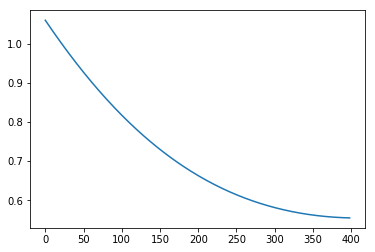

In [157]:
weights1=train_model(weight0,.002,399)